# EDA/TimeSeriesAnalysis/Scikit-Lesson(2)

# Time Series Analysis

For this section we will need the following packages; pandas, matplotlib, numpy, statsmodels, sklearn, 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Section 1

### Time Series Analysis Basics and loading data

Time series analysis is a sequence of evenly spaced out observations recorded at a specific time interval. 

Time series analysis involves multiple steps...
- 1) Data Collection
- 2) Data Preprocessing
- 3) Visualization
- 4) Stationarity Assessment
- 5) Model Selection
- 6) Parameter Estimation
- 7) Model Fitting and Diagnostic Checking
- 8) Forecasting

Different sources will have slightly different wording and may merge a few steps together but the essence of TSA(Time-Series analysis) is to achieve an effective model capable of forecasting, pattern recognition, anomaly detection, etc... It's usage could be applied to a wide variety of different positions and fields, basically anywhere that data is collected over time can be a use-case for TSA.

In [2]:
df_stocks = pd.read_csv('sp500_index.csv')

## Section 2

### Data Preprocessing

Data preprocessing is to clean the data by handling missing values, outliers, and inconsistencies. This step may also involve transforming the data if necessary, such as taking logarithms or differencing to stabilize the variance. Since time-series data is evenly spaced out filling in these NA values is incredibly important.

In [3]:
import numpy as np

# Handle missing values by filling with the mean
data_filled = df_stocks.fillna(df_stocks['S&P500'].mean())

# Log transformation to stabilize variance
data_log = np.log(df_stocks['S&P500'])

<span style ="background-color:yellow">
TODO: If we are cleaning for outliers how do we test for that and what steps should we take to remove those outliers. Discuss amongst yourselves and come up with an answer. In a couple sentences explain to somebody nearby what an outlier does to the mean when the data is right tailed.
</span>

## Section 3

### Visualization of the data

Plot the time series data to observe it's overall pattern and identify any apparent trends, seasonality, or other patterns. Visualization can provide insights into the underlying behavior of the data.

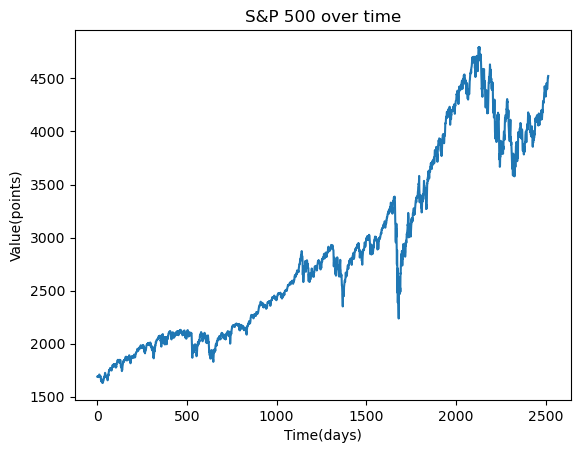

In [4]:
import matplotlib.pyplot as plt

# Plot the time series
plt.plot(df_stocks['S&P500'])
plt.title('S&P 500 over time')
plt.xlabel('Time(days)')
plt.ylabel('Value(points)')
plt.show()

## Section 4

### Stationarity Assessment

Check if the time series data is stationary, meaning it has a constant mean and variance over time. Stationarity is an important assumption for many time series models. If the data is not stationary, it may require transformation or differencing to achieve stationarity.

In [5]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
result = adfuller(df_stocks['S&P500'])

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')

Time series is non-stationary


Since the data is non-stationary, we must find a method to stabilize the variance and the mean over time.

Method 1: Log Transformation
If the data exhibits exponential growth or has a varying variance, applying a logarithmic transformation can help stabilize the variance and make it exhibit higher stationarity.

In [6]:
# Differencing to achieve stationarity
stationary_data = df_stocks['S&P500'].diff().dropna()

In [7]:
result = adfuller(stationary_data)

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')

Time series is stationary


Since the data has stationarity we can move on to the next step which would be selecting a model to best represent our data.

## Section 5

### Model Selection

Select an appropriate time series model based on the characteristics of the data. Common models include autoregressive integrated moving average (ARIMA), exponential smoothing methods, and state space models. The choice of model depends on the presence of trends, seasonality, and other specific characteristics observed in the data.

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(stationary_data, order=(1, 1, 1))
model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})

c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: optimizer_kwargs. After relea

## Section 6

### Parameter Estimation

Estimate the parameters of the chosen model using various estimation techniques, such as maximum likelihood estimation (MLE) or least squares.

In [9]:
# Estimate parameters using maximum likelihood estimation
model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})

c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: optimizer_kwargs. After release 0.14, this will raise.
  warnings.warn(


## Section 7

### Model Fitting and Diagnostic Checking

Fit the model to the data and evaluate its performance. This step involves checking the residuals for patterns or systematic deviations from randomness. Diagnostic tests help ensure that the model assumptions are met and the model adequately captures the data patterns.

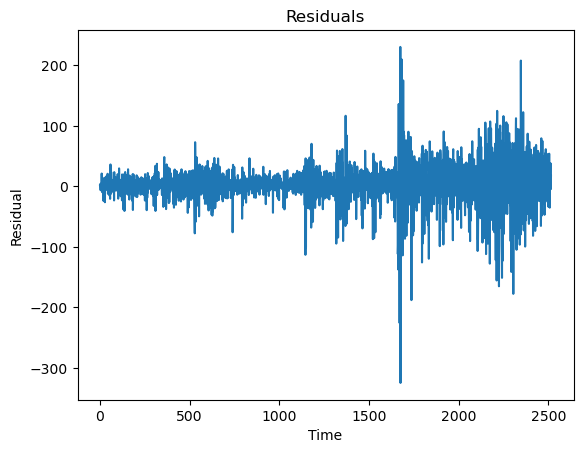

TypeError: '>=' not supported between instances of 'str' and 'float'

In [15]:
# Plot residuals
residuals = model_fit.resid
plt.plot(stationary_data)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Perform Ljung-Box test for residual randomness
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate Ljung-Box test statistics and p-values
lb_value, p_value = acorr_ljungbox(residuals)

# Check p-value for residual randomness
if all(p >= 0.05 for p in p_value):
    print('Residuals are random')
else:
    print('Residuals have patterns')

## Section 8

### Forecasting

Use the fitted model to make predictions about future values of the time series. Forecasting can provide valuable insights for decision-making and planning.

In [12]:
# Make predictions for future values
forecast = model_fit.forecast(steps=10)

# Print forecasted values
print(forecast)

2515   -0.521416
2516    1.296528
2517    1.111807
2518    1.130576
2519    1.128669
2520    1.128863
2521    1.128843
2522    1.128845
2523    1.128845
2524    1.128845
Name: predicted_mean, dtype: float64


c:\Users\vinna\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Conclusions


The above model you may see is very basic as the training data is simple and the clean up was to only check for stationarity. In real world applications the process is not as straight forward and requires an increased amount of precision. This usually requires multiple different tests using different models with different parameters. You can probably tell it can get quite complicated rather quickly and that this lesson is just grazing the iceberg. 